In [1]:
import pandas as pd


In [5]:
dados = pd.read_csv("sms_senior.csv", encoding='latin1')

In [9]:
dados.Full_Text[1]

'came to look at the flat, seems ok, in his 50s? * Is away alot wiv work. Got woman coming at 6.30 too.'

In [12]:
list(dados.columns)

['Full_Text',
 'got',
 'great',
 'wat',
 'free',
 'text',
 'txt',
 'win',
 'already',
 'dun',
 'say',
 'around',
 'dont',
 'think',
 'back',
 'hey',
 'like',
 'now',
 'send',
 'still',
 'even',
 'friends',
 'per',
 'call',
 'claim',
 'customer',
 'prize',
 'mobile',
 'gonna',
 'home',
 'ive',
 'soon',
 'today',
 'tonight',
 'want',
 'cash',
 'reply',
 'urgent',
 'week',
 'won',
 'help',
 'right',
 'take',
 'will',
 'wont',
 'message',
 'next.',
 'make',
 'name',
 'yes',
 'feel',
 'thats',
 'way',
 'miss',
 'going',
 'try',
 'first',
 'lor',
 'can',
 'meet',
 'getting',
 'just',
 'lol',
 'really',
 'always',
 'love',
 'amp',
 'ill',
 'know',
 'let',
 'work',
 'sure',
 'wait',
 'yeah',
 'anything',
 'tell',
 'please',
 'thanks',
 'msg',
 'see',
 'pls',
 'need',
 'nokia',
 'tomorrow',
 'hope',
 'ltgt',
 'well',
 'didnt',
 'get',
 'ask',
 'cant',
 'time',
 'morning',
 'place',
 'give',
 'happy',
 'sorry',
 'new',
 'find',
 'year',
 'later',
 'pick',
 'good',
 'come',
 'nice',
 'said',
 'da

In [10]:
dados

,Full_Text,got,great,wat,free,text,txt,win,already,dun,...,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,"Sorry, left phone upstairs. OK, might be hecti...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,22,2017-03-31 21:13:00,no
5570,Tell me they're female :V how're you throwing ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,19,2017-03-31 22:19:00,no
5571,A £400 XMAS REWARD IS WAITING FOR YOU! Our com...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,27,2017-03-31 23:15:00,yes
5572,Hey i've booked the pilates and yoga lesson al...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3,11,2017-03-31 23:32:00,no


## Primeiros insights:
* existe uma relacao entre o common words e o IsSpam?
* existe uma relacao entre a taxa common_words/word_count e o IsSpam?

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dados['IsSpam'] = le.fit_transform(dados['IsSpam'])
dados['Common_Word_Count'].corr(dados['IsSpam'])


0.26254371135682153

In [16]:
dados["ratio"] = dados['Common_Word_Count']/dados['Word_Count']
dados['ratio'].corr(dados['IsSpam'])


-0.01911609633905695

### Aparentemente a correlacao entre contagens e spam eh fraca, porem pode ser maior para algumas palavras especificas. Tambem podemos ver a media de contagem de common words pra spam e nao spam

In [26]:
media_nao_spam = dados['Common_Word_Count'].loc[dados['IsSpam']==0].mean()
media_spam = dados['Common_Word_Count'].loc[dados['IsSpam']==1].mean()

moda_nao_spam = dados['Common_Word_Count'].loc[dados['IsSpam']==0].mode().values
moda_spam = dados['Common_Word_Count'].loc[dados['IsSpam']==1].mode().values

mediana_nao_spam = dados['Common_Word_Count'].loc[dados['IsSpam']==0].median()
mediana_spam = dados['Common_Word_Count'].loc[dados['IsSpam']==1].median()

print("media de contagem de palavras pra nao spam: ", media_nao_spam,", media pra spam: ", media_spam)
print("moda de contagem de palavras pra nao spam: ", moda_nao_spam,", moda pra spam: ", moda_spam)
print("mediana de contagem de palavras pra nao spam: ", mediana_nao_spam,", mediana pra spam: ", mediana_spam)

media de contagem de palavras pra nao spam:  2.7959395069401283 , media pra spam:  4.8460508701472556
moda de contagem de palavras pra nao spam:  [2] , moda pra spam:  [5]
mediana de contagem de palavras pra nao spam:  2.0 , mediana pra spam:  5.0


apesar de nao existir uma correlacao linear, a caracteristica de spam eh bastante influenciada pela MEDIA, MODA E MEDIANA de palavras comuns

## Agora analisando a correlacao (pearson) entre colunas e o booleano IsSpam

* eh usada a funcao lambda pra ordenar pelo valor absoluto da correlacao, ou seja, correlacao negativa forte tambem pode estar no topo da lista

In [55]:
import operator

correlacao = dict(dados.corr()["IsSpam"])

ordenados = sorted(correlacao.items(), key= lambda k: abs(k[1]), reverse = True)

In [60]:
top = ordenados[1:11]

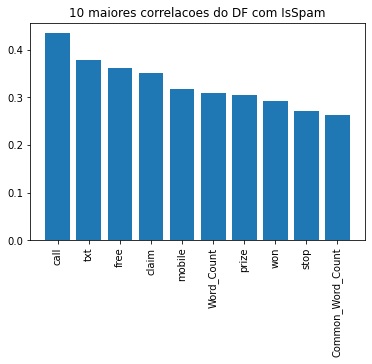

In [66]:
import matplotlib.pyplot as plt 

x = [item[0] for item in top]
y = [item[1] for item in top]
plt.bar(x,y)
plt.title("10 maiores correlacoes do DF com IsSpam")
plt.xticks(rotation='vertical')
plt.show()